# MLG: Lab SOM (Part 1)

Throughout the laboratories, questions that you should try to answer are highlighted as follows :

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Try to answer these questions / run the proposed experiments for your own comprehension. </p>


## Introduction

In this laboratory, we will work with a different type of problem called unsupervised learning.
When we talk about unsupervised learning, it means that we are trying to find **hidden structure** in unlabeled data. Therefore, no simple measure exists to evaluate a potential solution.


We will focus on a commonly used algorithm to solve this kind of problem called "Self Organizing Maps".
As you saw in the theoretical part of the course, the main advantage of this algorithm is its topological ordering, which means that the maps can be visualized as **elastic grids**. Therefore they can be easily plotted.

## Pre-requisites

For the following exercises, you could need several new packages. Install them as follows:

    $ pip install seaborn
    
After these, you should be able to import them. If any error occurs after, it maybe because some modules are missing. Try to install them with:

    $ conda install name_of_the_missing_module

## Exercise 1 : Animals database clustering with Kohonen Self-Organizing Maps

### Dataset information

In the general sense, the Self-Organizing Maps algorithm is used as a dimensionality reduction algorithm. It transforms a "n-dimensional" data into a 2-dimensional elastic grid.

In this particular exercise, we will look at an example from the course: applying SOM on animals data.

Each row is an animal, and is constructed by the presence (1) or absence (0) of 13 different attributes. You can look at the plot hereafter, or generate it yourself with this code:

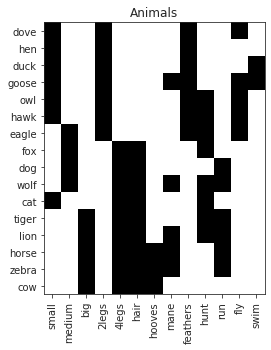

In [2]:
import KohonenUtils
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import cm
import matplotlib.patches as mpatches
import math
%matplotlib inline

matrix = np.array([[1,0,0,1,0,0,0,0,1,0,0,1,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,1],
                   [1,0,0,1,0,0,0,1,1,0,0,1,1],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,0,1,1,0,0,0,1,0,0,0],
                   [0,1,0,0,1,1,0,0,0,0,1,0,0],
                   [0,1,0,0,1,1,0,1,0,1,1,0,0],
                   [1,0,0,0,1,1,0,0,0,1,0,0,0],
                   [0,0,1,0,1,1,0,0,0,1,1,0,0],
                   [0,0,1,0,1,1,0,1,0,1,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,0,0,0,0,0,0]])

animals = pd.DataFrame(matrix.astype(float),columns=['small', 'medium', 'big', '2legs', '4legs', 'hair', 'hooves',
                                'mane', 'feathers', 'hunt', 'run', 'fly', 'swim'])

animals.index = ['dove', 'hen', 'duck', 'goose', 'owl', 'hawk', 'eagle', 'fox',
                 'dog', 'wolf', 'cat', 'tiger', 'lion', 'horse', 'zebra', 'cow']

pl.figure(figsize=(5,5))
pl.xticks(np.arange(matrix.shape[1]), animals.columns, rotation=90)
pl.yticks(np.arange(matrix.shape[0]), animals.index)
pl.title('Animals')
_ = pl.imshow(matrix, interpolation='nearest', cmap=cm.binary)

This is the features on which we will run our SOM algorithm in order to find an inherent data structure, or similarities between samples.

### Definition of the problem

In this problem, we will apply the SOM algorithm as follows:
    
1. Initialize SOM with its parameters (such as size of the map, neighborood size, learning rate...)
2. Sequentially present a random sample animal for the map to learn
3. Repeat step 2 until the whole dataset was learned t times

After the SOM has been "trained", we can then visualize it by plotting its U-Matrix (also known as Unified Distance Matrix) which shows the neurons and the distance with their neighbors.
To construct a U-Matrix, we need to:

1. Create a cell for each neuron
2. Create a cell for each 1-1 connection between two neurons
3. Assign these new cells the distance between the two neurons they connect (higher is further apart)

In the end, if we have a very simple SOM (2x2):

    Neuron(0) - Neuron(1)
       |           |
    Neuron(2) - Neuron(4)

The corresponding U-Matrix (2\*2 -1=3, 2\*2 -1=3) will be:

    Neuron(0) - Dist(0,1) - Neuron(1)
       |           |           |
    Dist(0,2) -  ?????    - Dist(1,3)
       |           |           |
    Neuron(2) - Dist(2,3) - Neuron(3)
    

We are only going to plot the distances.

Let us present the animal dataset 10 times to a newly generated kohonen map. We can then compute its U-matrix and plot the result.

### First tests with SOM and U-Matrix

/home/luc/HEIG/Semestre6/MLG/Labos/PW5-UnsupervisedLearning/kohonen.py:430: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self._neighborhood_mask[z] ** (1.0 / sigma / sigma)


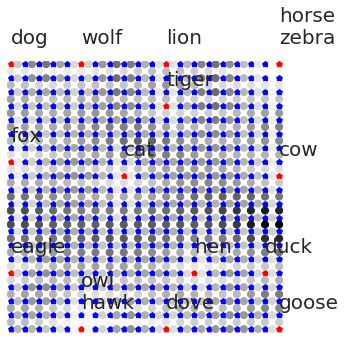

In [2]:
kmap = KohonenUtils.KohonenMap(20,
                               20,
                               size_vector=len(animals.columns))
n_iter = 10
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(animals.index))
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(animals.index), 1, n_iter * len(animals.index))

kmap.train(animals.values, np.array(animals.index), n_iter, learning_rate, neighborhood_size)

kmap.plot_umatrix(plot_names=True, plot_empty=True, fontsize=20)

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Analyze the code (in KohonenUtils.py) to understand what are the uses of each block in the cell right above.</p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What do you think about the clustering quality ? </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: We plotted the U-Matrix in the previous cell. What does it represent ? </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What do the small stars represent ? What do the bigger circles represent ? </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What does the color in the big circles mean ? </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: What does the color in the small stars mean ? </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Plot the learning rate and the neighborhood size. Why do you think we choose them like this? </p>

## Exercise 2 : Animals database clustering with K-Means

Now, lets try K-means as a means for clustering the animals. You need to install sklearn first and then run the next cell. 

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init=1, init='random').fit(animals.values)
print (animals.index,kmeans.labels_)

Index(['dove', 'hen', 'duck', 'goose', 'owl', 'hawk', 'eagle', 'fox', 'dog',
       'wolf', 'cat', 'tiger', 'lion', 'horse', 'zebra', 'cow'],
      dtype='object') [1 1 1 1 2 2 2 0 0 0 0 0 0 0 0 0]


<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Observe the animals that are grouped together by K-Means and try different numbers of clusters: K=2,3,4, etc. </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: n_init is a parameter that automatically asks K-means to try different cluster initializations and selects the best result. init='random' asks K-means to randomly initialize the cluster centroids. Please, try init=’k-means++’ and modify n_init to 10 for example and observe the results. </p>

## Exercice 3 : Wine database clustering with K-Means

Now, use the K-means algorithm to separate the three types of wine in the Wine dataset (K = 3).

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Observe the observations that are grouped together by K-Means. </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Count the number of "bottles" that are correctly grouped. What is the accuracy of this unsupervised classification? </p>

<p style="background-color:#006600; color:#fff;padding:5px; font-weight:bold">Q: Try to improve the performance of the classification. Does normalizing the data increases the accuracy? Does selecting a reduced number of features improves the accuracy? Why?. </p>

In [3]:
def plot_confusion_matrix(confmat, labels_names, ax=None):
    """Print a nice confusion matrix"""
    confmat = confmat.astype(int)
    
    if ax is None:
        ax = pl.subplot(111)
    cmim = ax.matshow(confmat, interpolation='nearest', cmap=cm.jet)

    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.annotate(str(confmat[i, j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center',
                        fontsize=12,
                        color="darkgrey",
                        weight="bold")

    ax.set_xticks(np.arange(confmat.shape[0]))
    ax.set_xticklabels([labels_names[l] for l in range(confmat.shape[0])], rotation='horizontal')
    ax.set_yticks(np.arange(confmat.shape[1]))
    ax.set_yticklabels([labels_names[l] for l in range(confmat.shape[1])])
    
    ax.set_xlabel('Predicted label')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('Target label')
    
    pl.colorbar(cmim, orientation='vertical', pad=0.05)
    pl.plot()

## First experience

In [5]:
from sklearn.datasets import load_wine

data = load_wine()
features = data.data
classes = data.target
classes_names = data.target_names

In [35]:
from sklearn.metrics import confusion_matrix, f1_score

def results(actual, predictions, names = classes_names):
    pred_vs_actual = [x for x in zip(predictions, actual)]
    accurate_preds = [t for t in pred_vs_actual if t[0] == t[1]]
    
    accurate = len(accurate_preds)
    wrong = len(pred_vs_actual) - len(accurate_preds)
    print("Accurate predictions:", accurate)
    print("False predictions:", wrong)
    print("Accuracy:", accurate * 100 / (accurate + wrong), "%")
    print("F1-score:", f1_score(actual, predictions, average=None))
    
    cmat = confusion_matrix(actual, predictions)
    plot_confusion_matrix(cmat, names)

In [11]:
kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++').fit(features)
kmeans.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int32)

Accurate predictions: 125
False predictions: 53
Accuracy: 70.2247191011236 %
F1-score: [0.86792453 0.71428571 0.52727273]


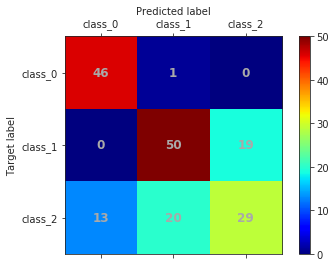

In [36]:
results(kmeans.labels_, classes)

## With normalized features

In [13]:
from sklearn.preprocessing import normalize

features_normalized = normalize(features)

In [25]:
kmeans_norm = KMeans(n_clusters=3, n_init=10, init='k-means++').fit(features_normalized)
kmeans_norm.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2,
       0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

Accurate predictions: 124
False predictions: 54
Accuracy: 69.66292134831461 %
F1-score: [0.85714286 0.61111111 0.62015504]


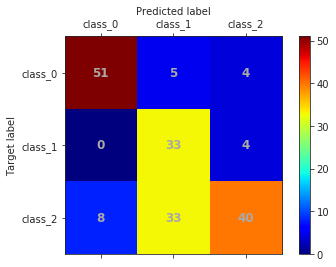

In [37]:
results(kmeans_norm.labels_, classes)

## Removing features

In [41]:
features_selected = features[:, [0, 5, 6, 12]]
len(features_selected[0])

4

In [42]:
kmeans_sel = KMeans(n_clusters=3, n_init=10, init='k-means++').fit(features_selected)
kmeans_sel.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int32)

Accurate predictions: 125
False predictions: 53
Accuracy: 70.2247191011236 %
F1-score: [0.86792453 0.71428571 0.52727273]


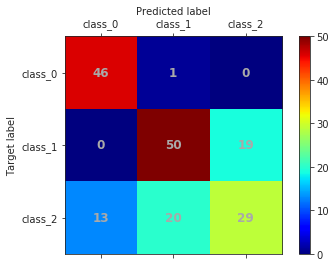

In [43]:
results(kmeans_sel.labels_, classes)